In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#change filename here if necessary
filename = 'Desktop\AAPL (3).csv'

df = pd.read_csv(filename)

df.sort_values('Date')

df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
4517,2018-08-31,226.509995,228.869995,226.000000,227.630005,227.630005,43340100
4518,2018-09-04,228.410004,229.179993,226.630005,228.360001,228.360001,27390100
4519,2018-09-05,228.990005,229.669998,225.100006,226.869995,226.869995,33333000
4520,2018-09-06,226.229996,227.350006,221.300003,223.100006,223.100006,34290000
4521,2018-09-07,221.850006,225.369995,220.710007,221.300003,221.300003,37619800
4522,2018-09-10,220.949997,221.850006,216.470001,218.330002,218.330002,39516500
4523,2018-09-11,218.009995,224.300003,216.559998,223.850006,223.850006,35749000
4524,2018-09-12,224.940002,225.000000,219.839996,221.070007,221.070007,49278700
4525,2018-09-13,223.520004,228.350006,222.570007,226.410004,226.410004,41706400
4526,2018-09-14,225.750000,226.839996,222.520004,223.839996,223.839996,31902700


In [6]:
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
open_prices = df.loc[:,'Open'].as_matrix()
close_prices = df.loc[:,'Close'].as_matrix()
OHLC_mean = (high_prices+low_prices+open_prices+close_prices)/4.0

print(OHLC_mean)

[  4.13783425   4.263393     4.29380375 ... 222.71250125 225.21250525
 224.737499  ]


C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yi Rong\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [7]:
scaler = MinMaxScaler()
OHLC_mean_scaled = OHLC_mean.reshape(-1,1)
OHLC_mean_scaled = scaler.fit_transform(OHLC_mean_scaled)
train_data = OHLC_mean_scaled[:4400]

print(OHLC_mean_scaled)

[[0.01410179]
 [0.01465439]
 [0.01478824]
 ...
 [0.97609053]
 [0.98709353]
 [0.98500294]]


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential

predictions = []

for step_size in range(1,31):
    X = OHLC_mean_scaled[:-step_size]
    Y = OHLC_mean_scaled[step_size:]

    trainX = X.reshape(-1, 1,1)

    trainY = Y




    model = Sequential()
    model.add(LSTM(units=16, input_shape=(None, 1), return_sequences=True))
    model.add(LSTM(units=32, activation='relu'))
    model.add(Dense(units=1))
    model.compile( loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, batch_size=32, epochs=100, verbose = 1)

    trainPredict = model.predict(trainX)
    last_val = trainPredict[-1]
    last_val_scaled = last_val/last_val
    next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
    next_day_val = last_val*next_val
    
    predictions.append(next_day_val)
    
print (predictions)


Using TensorFlow backend.


Epoch 1/100
4400/4400 [==============================] - 6s 1ms/step - loss: 0.0509
Epoch 2/100
4400/4400 [==============================] - 1s 276us/step - loss: 0.0056
Epoch 3/100
4400/4400 [==============================] - 1s 284us/step - loss: 6.5591e-05
Epoch 4/100
4400/4400 [==============================] - 1s 266us/step - loss: 3.7136e-05
Epoch 5/100
4400/4400 [==============================] - 1s 282us/step - loss: 2.2752e-05
Epoch 6/100
4400/4400 [==============================] - 1s 286us/step - loss: 1.7501e-05
Epoch 7/100
4400/4400 [==============================] - 1s 266us/step - loss: 1.5768e-05
Epoch 8/100
4400/4400 [==============================] - 1s 266us/step - loss: 1.5612e-05
Epoch 9/100
4400/4400 [==============================] - 1s 284us/step - loss: 1.5716e-05
Epoch 10/100
4400/4400 [==============================] - 1s 260us/step - loss: 1.5990e-05
Epoch 11/100
4400/4400 [==============================] - 1s 271us/step - loss: 1.5572e-05
Epoch 12/100
4400/

4400/4400 [==============================] - 1s 265us/step - loss: 4.0010e-05
Epoch 82/100
4400/4400 [==============================] - 1s 258us/step - loss: 3.8030e-05
Epoch 83/100
4400/4400 [==============================] - 1s 258us/step - loss: 3.8905e-05
Epoch 84/100
4400/4400 [==============================] - 1s 300us/step - loss: 3.7217e-05
Epoch 85/100
4400/4400 [==============================] - 1s 258us/step - loss: 4.4573e-05
Epoch 86/100
4400/4400 [==============================] - 1s 257us/step - loss: 3.8427e-05
Epoch 87/100
4400/4400 [==============================] - 1s 267us/step - loss: 3.8322e-05
Epoch 88/100
4400/4400 [==============================] - 1s 286us/step - loss: 4.0327e-05
Epoch 89/100
4400/4400 [==============================] - 1s 258us/step - loss: 3.9636e-05
Epoch 90/100
4400/4400 [==============================] - 1s 260us/step - loss: 3.7373e-05
Epoch 91/100
4400/4400 [==============================] - 1s 277us/step - loss: 3.7293e-05
Epoch 92/100

4400/4400 [==============================] - 1s 270us/step - loss: 8.1284e-05
Epoch 62/100
4400/4400 [==============================] - 1s 268us/step - loss: 8.0525e-05
Epoch 63/100
4400/4400 [==============================] - 1s 276us/step - loss: 8.2720e-05
Epoch 64/100
4400/4400 [==============================] - 1s 264us/step - loss: 8.3158e-05
Epoch 65/100
4400/4400 [==============================] - 1s 261us/step - loss: 7.9909e-05
Epoch 66/100
4400/4400 [==============================] - 1s 268us/step - loss: 8.1994e-05
Epoch 67/100
4400/4400 [==============================] - 1s 282us/step - loss: 7.8689e-05
Epoch 68/100
4400/4400 [==============================] - 1s 262us/step - loss: 8.0845e-05
Epoch 69/100
4400/4400 [==============================] - 1s 262us/step - loss: 8.0585e-05
Epoch 70/100
4400/4400 [==============================] - 1s 260us/step - loss: 8.2351e-05
Epoch 71/100
4400/4400 [==============================] - 1s 258us/step - loss: 8.0601e-05
Epoch 72/100

4400/4400 [==============================] - 1s 330us/step - loss: 1.2097e-04
Epoch 42/100
4400/4400 [==============================] - 2s 344us/step - loss: 1.2379e-04
Epoch 43/100
4400/4400 [==============================] - 1s 331us/step - loss: 1.2088e-04
Epoch 44/100
4400/4400 [==============================] - 2s 386us/step - loss: 1.1746e-04
Epoch 45/100
4400/4400 [==============================] - 2s 365us/step - loss: 1.1736e-04 0s - loss: 1.14
Epoch 46/100
4400/4400 [==============================] - 2s 392us/step - loss: 1.1902e-04 0s - loss:
Epoch 47/100
4400/4400 [==============================] - 2s 435us/step - loss: 1.2164e-04
Epoch 48/100
4400/4400 [==============================] - 2s 351us/step - loss: 1.1895e-04
Epoch 49/100
4400/4400 [==============================] - 2s 366us/step - loss: 1.1951e-04
Epoch 50/100
4400/4400 [==============================] - 2s 356us/step - loss: 1.1961e-04
Epoch 51/100
4400/4400 [==============================] - 2s 364us/step - lo

4400/4400 [==============================] - 1s 313us/step - loss: 1.3987e-04
Epoch 31/100
4400/4400 [==============================] - 1s 308us/step - loss: 1.4280e-04
Epoch 32/100
4400/4400 [==============================] - 1s 302us/step - loss: 1.4074e-04
Epoch 33/100
4400/4400 [==============================] - 1s 310us/step - loss: 1.4902e-04
Epoch 34/100
4400/4400 [==============================] - 2s 345us/step - loss: 1.3993e-04
Epoch 35/100
4400/4400 [==============================] - 1s 328us/step - loss: 1.4020e-04
Epoch 36/100
4400/4400 [==============================] - 1s 318us/step - loss: 1.4166e-04
Epoch 37/100
4400/4400 [==============================] - 1s 337us/step - loss: 1.3964e-04
Epoch 38/100
4400/4400 [==============================] - 1s 305us/step - loss: 1.4393e-04
Epoch 39/100
4400/4400 [==============================] - 1s 308us/step - loss: 1.4012e-04
Epoch 40/100
4400/4400 [==============================] - 1s 318us/step - loss: 1.4056e-04
Epoch 41/100

4400/4400 [==============================] - 2s 351us/step - loss: 1.6217e-04
Epoch 21/100
4400/4400 [==============================] - 1s 313us/step - loss: 1.6566e-04
Epoch 22/100
4400/4400 [==============================] - 1s 313us/step - loss: 1.6166e-04
Epoch 23/100
4400/4400 [==============================] - 1s 334us/step - loss: 1.6059e-04
Epoch 24/100
4400/4400 [==============================] - 1s 314us/step - loss: 1.5952e-04
Epoch 25/100
4400/4400 [==============================] - 1s 309us/step - loss: 1.6058e-04
Epoch 26/100
4400/4400 [==============================] - ETA: 0s - loss: 1.6403e-0 - 1s 314us/step - loss: 1.6304e-04
Epoch 27/100
4400/4400 [==============================] - 1s 313us/step - loss: 1.5965e-04
Epoch 28/100
4400/4400 [==============================] - 1s 311us/step - loss: 1.6154e-04
Epoch 29/100
4400/4400 [==============================] - 1s 341us/step - loss: 1.6588e-04
Epoch 30/100
4400/4400 [==============================] - 1s 337us/step - l

4400/4400 [==============================] - 1s 269us/step - loss: 1.8923e-04
Epoch 100/100
4400/4400 [==============================] - 1s 257us/step - loss: 1.8068e-04
Epoch 1/100
4400/4400 [==============================] - 4s 800us/step - loss: 0.0466
Epoch 2/100
4400/4400 [==============================] - 1s 280us/step - loss: 0.0072
Epoch 3/100
4400/4400 [==============================] - 1s 266us/step - loss: 3.1819e-04
Epoch 4/100
4400/4400 [==============================] - 1s 273us/step - loss: 2.2688e-04
Epoch 5/100
4400/4400 [==============================] - 1s 265us/step - loss: 2.1451e-04
Epoch 6/100
4400/4400 [==============================] - 1s 272us/step - loss: 2.1027e-04
Epoch 7/100
4400/4400 [==============================] - 1s 267us/step - loss: 2.0721e-04
Epoch 8/100
4400/4400 [==============================] - 1s 269us/step - loss: 2.0709e-04
Epoch 9/100
4400/4400 [==============================] - 1s 272us/step - loss: 2.0743e-04
Epoch 10/100
4400/4400 [====

4400/4400 [==============================] - 1s 276us/step - loss: 2.0144e-04
Epoch 90/100
4400/4400 [==============================] - 1s 270us/step - loss: 1.9739e-04
Epoch 91/100
4400/4400 [==============================] - 1s 264us/step - loss: 2.0097e-04
Epoch 92/100
4400/4400 [==============================] - 1s 279us/step - loss: 2.0265e-04
Epoch 93/100
4400/4400 [==============================] - 1s 259us/step - loss: 1.9834e-04
Epoch 94/100
4400/4400 [==============================] - 1s 258us/step - loss: 1.9674e-04
Epoch 95/100
4400/4400 [==============================] - 1s 282us/step - loss: 2.0500e-04
Epoch 96/100
4400/4400 [==============================] - 1s 326us/step - loss: 1.9805e-04
Epoch 97/100
4400/4400 [==============================] - 1s 267us/step - loss: 1.9918e-04
Epoch 98/100
4400/4400 [==============================] - 1s 275us/step - loss: 1.9823e-04
Epoch 99/100
4400/4400 [==============================] - 1s 281us/step - loss: 2.0680e-04
Epoch 100/10

4400/4400 [==============================] - 1s 260us/step - loss: 2.4497e-04
Epoch 70/100
4400/4400 [==============================] - 1s 256us/step - loss: 2.4874e-04
Epoch 71/100
4400/4400 [==============================] - 1s 275us/step - loss: 2.4261e-04
Epoch 72/100
4400/4400 [==============================] - 1s 263us/step - loss: 2.4690e-04
Epoch 73/100
4400/4400 [==============================] - 1s 277us/step - loss: 2.4546e-04
Epoch 74/100
4400/4400 [==============================] - 1s 275us/step - loss: 2.5119e-04
Epoch 75/100
4400/4400 [==============================] - 1s 271us/step - loss: 2.4529e-04
Epoch 76/100
4400/4400 [==============================] - 1s 262us/step - loss: 2.4446e-04
Epoch 77/100
4400/4400 [==============================] - 1s 265us/step - loss: 2.4024e-04
Epoch 78/100
4400/4400 [==============================] - 1s 281us/step - loss: 2.3928e-04
Epoch 79/100
4400/4400 [==============================] - 1s 267us/step - loss: 2.4476e-04
Epoch 80/100

4400/4400 [==============================] - 1s 252us/step - loss: 2.8978e-04
Epoch 50/100
4400/4400 [==============================] - 1s 256us/step - loss: 2.8473e-04
Epoch 51/100
4400/4400 [==============================] - 1s 262us/step - loss: 2.8900e-04
Epoch 52/100
4400/4400 [==============================] - 1s 311us/step - loss: 2.8991e-04
Epoch 53/100
4400/4400 [==============================] - 1s 296us/step - loss: 2.9373e-04
Epoch 54/100
4400/4400 [==============================] - 1s 294us/step - loss: 2.8823e-04
Epoch 55/100
4400/4400 [==============================] - 1s 321us/step - loss: 2.8683e-04
Epoch 56/100
4400/4400 [==============================] - 1s 327us/step - loss: 2.8462e-04
Epoch 57/100
4400/4400 [==============================] - 1s 274us/step - loss: 2.8742e-04
Epoch 58/100
4400/4400 [==============================] - 1s 277us/step - loss: 2.8729e-04
Epoch 59/100
4400/4400 [==============================] - 1s 268us/step - loss: 2.8729e-04
Epoch 60/100

Epoch 39/100
4400/4400 [==============================] - 1s 320us/step - loss: 3.1110e-04
Epoch 40/100
4400/4400 [==============================] - 1s 282us/step - loss: 3.0015e-04
Epoch 41/100
4400/4400 [==============================] - 1s 271us/step - loss: 3.1275e-04
Epoch 42/100
4400/4400 [==============================] - 1s 277us/step - loss: 3.0903e-04
Epoch 43/100
4400/4400 [==============================] - 1s 329us/step - loss: 3.1077e-04
Epoch 44/100
4400/4400 [==============================] - 1s 296us/step - loss: 3.0764e-04
Epoch 45/100
4400/4400 [==============================] - 1s 299us/step - loss: 3.1649e-04
Epoch 46/100
4400/4400 [==============================] - 1s 266us/step - loss: 3.0479e-04
Epoch 47/100
4400/4400 [==============================] - 1s 281us/step - loss: 3.1287e-04
Epoch 48/100
4400/4400 [==============================] - 1s 323us/step - loss: 3.0514e-04
Epoch 49/100
4400/4400 [==============================] - 1s 291us/step - loss: 3.0241e-04

4400/4400 [==============================] - 1s 284us/step - loss: 3.3645e-04
Epoch 30/100
4400/4400 [==============================] - 1s 295us/step - loss: 3.2387e-04
Epoch 31/100
4400/4400 [==============================] - 1s 293us/step - loss: 3.2603e-04
Epoch 32/100
4400/4400 [==============================] - 1s 310us/step - loss: 3.2821e-04
Epoch 33/100
4400/4400 [==============================] - 2s 359us/step - loss: 3.2863e-04
Epoch 34/100
4400/4400 [==============================] - 1s 308us/step - loss: 3.3209e-04
Epoch 35/100
4400/4400 [==============================] - 1s 318us/step - loss: 3.2923e-04
Epoch 36/100
4400/4400 [==============================] - 1s 263us/step - loss: 3.2412e-04
Epoch 37/100
4400/4400 [==============================] - 1s 259us/step - loss: 3.3553e-04
Epoch 38/100
4400/4400 [==============================] - 1s 263us/step - loss: 3.2611e-04
Epoch 39/100
4400/4400 [==============================] - 1s 316us/step - loss: 3.2979e-04
Epoch 40/100

4400/4400 [==============================] - 1s 262us/step - loss: 3.6326e-04
Epoch 10/100
4400/4400 [==============================] - 1s 258us/step - loss: 3.6215e-04
Epoch 11/100
4400/4400 [==============================] - 1s 258us/step - loss: 3.6279e-04
Epoch 12/100
4400/4400 [==============================] - 1s 270us/step - loss: 3.6533e-04
Epoch 13/100
4400/4400 [==============================] - 1s 255us/step - loss: 3.6561e-04
Epoch 14/100
4400/4400 [==============================] - 1s 283us/step - loss: 3.6631e-04
Epoch 15/100
4400/4400 [==============================] - 1s 262us/step - loss: 3.6564e-04
Epoch 16/100
4400/4400 [==============================] - 1s 260us/step - loss: 3.6405e-04
Epoch 17/100
4400/4400 [==============================] - 1s 255us/step - loss: 3.6556e-04
Epoch 18/100
4400/4400 [==============================] - 1s 260us/step - loss: 3.6310e-04
Epoch 19/100
4400/4400 [==============================] - 1s 271us/step - loss: 3.6617e-04
Epoch 20/100

4400/4400 [==============================] - 1s 262us/step - loss: 3.7694e-04
Epoch 90/100
4400/4400 [==============================] - 1s 259us/step - loss: 3.8140e-04
Epoch 91/100
4400/4400 [==============================] - 1s 272us/step - loss: 3.7669e-04
Epoch 92/100
4400/4400 [==============================] - 1s 260us/step - loss: 3.8043e-04
Epoch 93/100
4400/4400 [==============================] - 1s 258us/step - loss: 3.8136e-04
Epoch 94/100
4400/4400 [==============================] - 1s 255us/step - loss: 3.7788e-04
Epoch 95/100
4400/4400 [==============================] - 1s 260us/step - loss: 3.7865e-04
Epoch 96/100
4400/4400 [==============================] - 1s 257us/step - loss: 3.8058e-04
Epoch 97/100
4400/4400 [==============================] - 1s 262us/step - loss: 3.8187e-04
Epoch 98/100
4400/4400 [==============================] - 1s 272us/step - loss: 3.7634e-04
Epoch 99/100
4400/4400 [==============================] - 1s 260us/step - loss: 3.7656e-04
Epoch 100/10

4400/4400 [==============================] - 1s 265us/step - loss: 4.0809e-04
Epoch 70/100
4400/4400 [==============================] - 1s 274us/step - loss: 4.3004e-04
Epoch 71/100
4400/4400 [==============================] - 1s 264us/step - loss: 4.1466e-04
Epoch 72/100
4400/4400 [==============================] - 1s 261us/step - loss: 4.1628e-04
Epoch 73/100
4400/4400 [==============================] - 1s 260us/step - loss: 4.0716e-04
Epoch 74/100
4400/4400 [==============================] - 1s 261us/step - loss: 4.1277e-04
Epoch 75/100
4400/4400 [==============================] - 1s 263us/step - loss: 4.1978e-04
Epoch 76/100
4400/4400 [==============================] - 1s 264us/step - loss: 4.2784e-04
Epoch 77/100
4400/4400 [==============================] - 1s 279us/step - loss: 4.1232e-04
Epoch 78/100
4400/4400 [==============================] - 1s 259us/step - loss: 4.0873e-04
Epoch 79/100
4400/4400 [==============================] - 1s 279us/step - loss: 4.1098e-04
Epoch 80/100

4400/4400 [==============================] - 1s 278us/step - loss: 4.6399e-04
Epoch 50/100
4400/4400 [==============================] - 1s 277us/step - loss: 4.6511e-04
Epoch 51/100
4400/4400 [==============================] - 1s 300us/step - loss: 4.7401e-04
Epoch 52/100
4400/4400 [==============================] - 1s 290us/step - loss: 4.7498e-04
Epoch 53/100
4400/4400 [==============================] - 1s 284us/step - loss: 4.6767e-04
Epoch 54/100
4400/4400 [==============================] - 1s 282us/step - loss: 4.5403e-04
Epoch 55/100
4400/4400 [==============================] - 1s 275us/step - loss: 4.5748e-04
Epoch 56/100
4400/4400 [==============================] - 1s 283us/step - loss: 4.5814e-04
Epoch 57/100
4400/4400 [==============================] - 1s 275us/step - loss: 4.6356e-04
Epoch 58/100
4400/4400 [==============================] - 1s 301us/step - loss: 4.8749e-04
Epoch 59/100
4400/4400 [==============================] - 1s 270us/step - loss: 4.5887e-04
Epoch 60/100

4400/4400 [==============================] - 1s 267us/step - loss: 4.8041e-04
Epoch 40/100
4400/4400 [==============================] - 1s 268us/step - loss: 4.8928e-04
Epoch 41/100
4400/4400 [==============================] - 1s 268us/step - loss: 4.7974e-04
Epoch 42/100
4400/4400 [==============================] - 1s 267us/step - loss: 4.7666e-04
Epoch 43/100
4400/4400 [==============================] - 1s 283us/step - loss: 4.7900e-04
Epoch 44/100
4400/4400 [==============================] - 1s 268us/step - loss: 4.8218e-04
Epoch 45/100
4400/4400 [==============================] - 1s 292us/step - loss: 4.7711e-04
Epoch 46/100
4400/4400 [==============================] - 1s 268us/step - loss: 4.7392e-04
Epoch 47/100
4400/4400 [==============================] - 1s 273us/step - loss: 4.7603e-04
Epoch 48/100
4400/4400 [==============================] - 1s 269us/step - loss: 4.7533e-04
Epoch 49/100
4400/4400 [==============================] - 1s 282us/step - loss: 4.7869e-04
Epoch 50/100

4400/4400 [==============================] - 1s 270us/step - loss: 5.1476e-04
Epoch 20/100
4400/4400 [==============================] - 1s 270us/step - loss: 5.1412e-04
Epoch 21/100
4400/4400 [==============================] - 1s 287us/step - loss: 5.1382e-04
Epoch 22/100
4400/4400 [==============================] - 1s 272us/step - loss: 5.2587e-04
Epoch 23/100
4400/4400 [==============================] - 1s 275us/step - loss: 5.1784e-04
Epoch 24/100
4400/4400 [==============================] - 1s 272us/step - loss: 5.1507e-04
Epoch 25/100
4400/4400 [==============================] - 1s 274us/step - loss: 5.1779e-04
Epoch 26/100
4400/4400 [==============================] - 1s 274us/step - loss: 5.1301e-04
Epoch 27/100
4400/4400 [==============================] - 1s 285us/step - loss: 5.0998e-04
Epoch 28/100
4400/4400 [==============================] - 1s 273us/step - loss: 5.2042e-04
Epoch 29/100
4400/4400 [==============================] - 1s 286us/step - loss: 5.1952e-04
Epoch 30/100

Epoch 9/100
4400/4400 [==============================] - 1s 272us/step - loss: 5.4046e-04
Epoch 10/100
4400/4400 [==============================] - 1s 273us/step - loss: 5.4245e-04
Epoch 11/100
4400/4400 [==============================] - 1s 274us/step - loss: 5.4833e-04
Epoch 12/100
4400/4400 [==============================] - 1s 288us/step - loss: 5.5827e-04
Epoch 13/100
4400/4400 [==============================] - 1s 274us/step - loss: 5.4410e-04
Epoch 14/100
4400/4400 [==============================] - 1s 301us/step - loss: 5.4551e-04
Epoch 15/100
4400/4400 [==============================] - 1s 277us/step - loss: 5.4613e-04
Epoch 16/100
4400/4400 [==============================] - 1s 277us/step - loss: 5.3833e-04
Epoch 17/100
4400/4400 [==============================] - 1s 275us/step - loss: 5.3789e-04
Epoch 18/100
4400/4400 [==============================] - 1s 291us/step - loss: 5.4547e-04
Epoch 19/100
4400/4400 [==============================] - 1s 271us/step - loss: 5.4998e-04


4400/4400 [==============================] - 2s 387us/step - loss: 5.8017e-04
Epoch 88/100
4400/4400 [==============================] - 2s 381us/step - loss: 5.6782e-04
Epoch 89/100
4400/4400 [==============================] - 2s 376us/step - loss: 5.6163e-04
Epoch 90/100
4400/4400 [==============================] - 2s 391us/step - loss: 5.6480e-04 0s - loss: 5.6356e-0
Epoch 91/100
4400/4400 [==============================] - 2s 389us/step - loss: 5.6819e-04
Epoch 92/100
4400/4400 [==============================] - 2s 380us/step - loss: 5.6290e-04
Epoch 93/100
4400/4400 [==============================] - 2s 364us/step - loss: 5.6539e-04
Epoch 94/100
4400/4400 [==============================] - 2s 414us/step - loss: 5.6422e-04
Epoch 95/100
4400/4400 [==============================] - 2s 368us/step - loss: 5.7086e-04
Epoch 96/100
4400/4400 [==============================] - 2s 353us/step - loss: 5.7173e-04
Epoch 97/100
4400/4400 [==============================] - 2s 385us/step - loss: 5.

4400/4400 [==============================] - 2s 364us/step - loss: 5.9514e-04
Epoch 77/100
4400/4400 [==============================] - 2s 379us/step - loss: 5.8831e-04
Epoch 78/100
4400/4400 [==============================] - 2s 389us/step - loss: 6.0153e-04
Epoch 79/100
4400/4400 [==============================] - 2s 374us/step - loss: 5.8760e-04
Epoch 80/100
4400/4400 [==============================] - 2s 396us/step - loss: 5.9321e-04
Epoch 81/100
4400/4400 [==============================] - 2s 347us/step - loss: 5.8449e-04
Epoch 82/100
4400/4400 [==============================] - 2s 392us/step - loss: 5.9230e-04 0s - l
Epoch 83/100
4400/4400 [==============================] - 2s 346us/step - loss: 5.8093e-04
Epoch 84/100
4400/4400 [==============================] - 2s 356us/step - loss: 5.8550e-04
Epoch 85/100
4400/4400 [==============================] - 2s 382us/step - loss: 5.8077e-04
Epoch 86/100
4400/4400 [==============================] - 2s 354us/step - loss: 5.8259e-04
Epoch

In [5]:
one_month_predictions = []
for x in predictions:
    x = np.asscalar(x)
    one_month_predictions.append(x)
print(one_month_predictions)

[0.8037126064300537, 0.7795899510383606, 0.8218672871589661, 0.7949126958847046, 0.785728394985199, 0.7845578789710999, 0.680543839931488, 0.7432599067687988, 0.7507035136222839, 0.7111404538154602, 0.7707957029342651, 0.7779421806335449, 0.7964590787887573, 0.8130064010620117, 0.6815289855003357, 0.8052123785018921, 0.7108018398284912, 0.8086260557174683, 0.78510981798172, 0.6708025932312012, 0.658755898475647, 0.7141581177711487, 0.7039555907249451, 0.6697893142700195, 0.68543940782547, 0.7517825961112976, 0.8099079728126526, 0.809185266494751, 0.7934170961380005, 0.6942436695098877]


In [6]:
highest = max(OHLC_mean)
one_month_predictions = [highest*x for x in one_month_predictions]
print (one_month_predictions)

[183.36301319676906, 177.85954996433924, 187.50491284528277, 181.35535759880045, 179.26000526319453, 178.99295788627998, 155.26267487157722, 169.57103198721254, 171.26925367838362, 162.2431393690835, 175.85318622403472, 177.48361938409676, 181.70815712760535, 185.48334598004746, 155.48743090812084, 183.70517869722346, 162.16588628077253, 184.48399208813134, 179.11888001227186, 153.04025813583434, 150.2918649517934, 162.9316043145173, 160.60394877390928, 152.8090836064756, 156.3795742124214, 171.51544095364895, 184.77645506477361, 184.61157323133392, 181.01414399346694, 158.3882225010161]


In [7]:
print(OHLC_mean[4400:4430])

[178.352497   175.93750375 175.55500375 173.164997   170.03250125
 167.04750025 170.09500475 171.02249525 167.2350005  168.55999775
 166.68249875 167.41500075 168.31750125 172.92250075 170.00749975
 170.7175025  172.94499975 172.57249825 173.897499   174.79999925
 175.4675025  177.520004   177.8375015  173.65250025 168.24250025
 165.77000025 164.04000075 163.52499775 164.35999675 162.8200035 ]


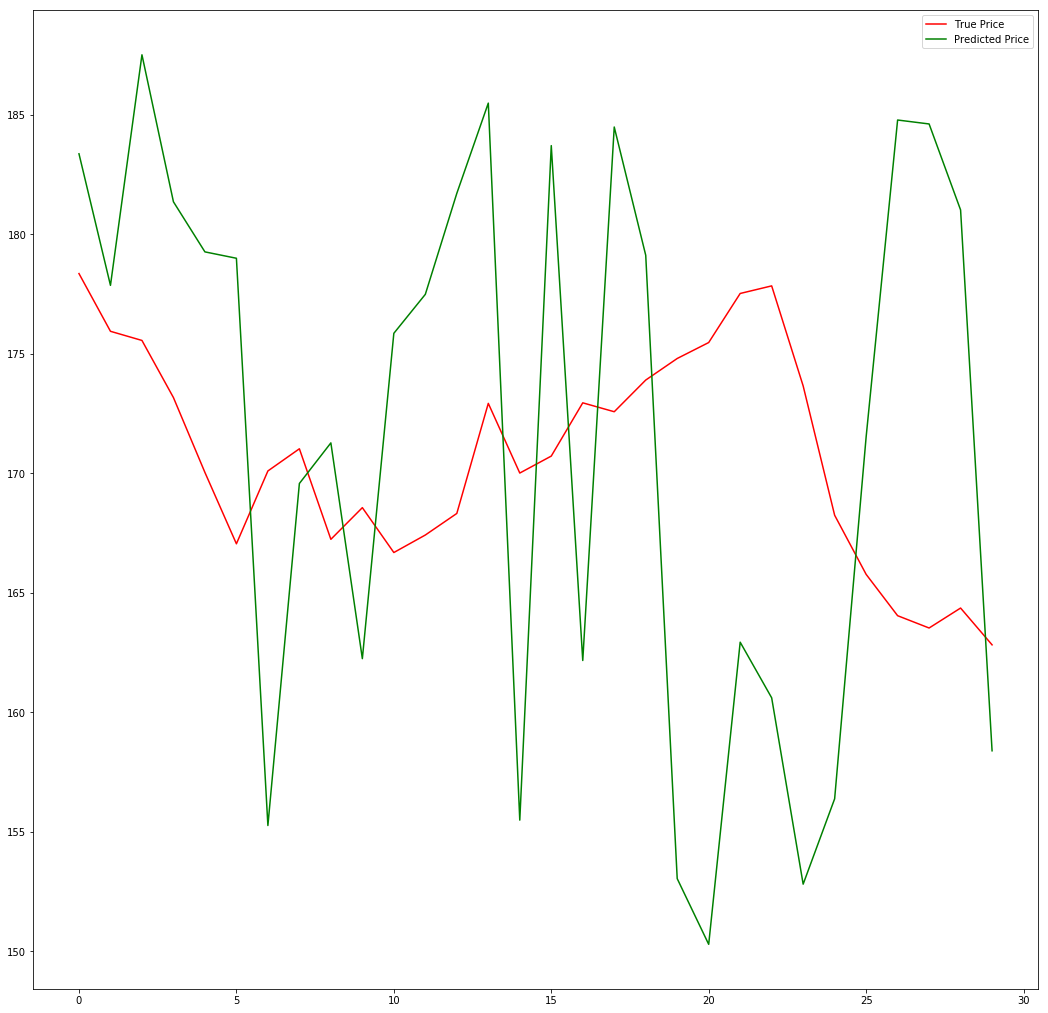

In [8]:
plt.figure(figsize = (18,18))
plt.plot(OHLC_mean[4400:4430], color = 'red', label = 'True Price')
plt.plot(one_month_predictions, color = 'green', label = 'Predicted Price')
plt.legend()
plt.show()

In [10]:
true_values = OHLC_mean[4400:4430]
counter = 0;
for i in range(len(true_values)-1):
    if true_values[i+1] > true_values[i] and one_month_predictions[i+1] > one_month_predictions[i]:
        counter = counter + 1
    elif true_values[i+1] < true_values[i] and one_month_predictions[i+1] < one_month_predictions[i]:
        counter = counter + 1
print (counter)

14


In [8]:
one_month_predictions = [183.36301319676906, 177.85954996433924, 187.50491284528277, 181.35535759880045, 179.26000526319453, 178.99295788627998, 155.26267487157722, 169.57103198721254, 171.26925367838362, 162.2431393690835, 175.85318622403472, 177.48361938409676, 181.70815712760535, 185.48334598004746, 155.48743090812084, 183.70517869722346, 162.16588628077253, 184.48399208813134, 179.11888001227186, 153.04025813583434, 150.2918649517934, 162.9316043145173, 160.60394877390928, 152.8090836064756, 156.3795742124214, 171.51544095364895, 184.77645506477361, 184.61157323133392, 181.01414399346694, 158.3882225010161]
true_values = OHLC_mean[4400:4430]

In [10]:
three_day_interval = []
for i in range (len(true_values)-1):
    if i %  3 == 0:
        three_day_interval.append(true_values[i])
        
three_day_predictions = []
for i in range (len(one_month_predictions)-1):
    if i % 3 == 0:
        three_day_predictions.append(one_month_predictions[i])
        
counter = 0;
for i in range(len(three_day_predictions)-1):
    if three_day_interval[i+1] > three_day_interval[i] and  three_day_predictions[i+1] >  three_day_predictions[i]:
        counter = counter + 1
    elif three_day_interval[i+1]< three_day_interval[i] and  three_day_predictions[i+1] < three_day_predictions[i]:
        counter = counter + 1
print (counter)

4
